In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.family': 'sans serif'})
plt.rcParams.update({'mathtext.default':'regular'})
plt.rcParams.update({'mathtext.fontset':'stixsans'})
plt.rcParams.update({'axes.linewidth': 1.5})
plt.rcParams.update({'xtick.direction':'in'})
plt.rcParams.update({'xtick.major.size': 5})
plt.rcParams.update({'xtick.major.width': 1.25 })
plt.rcParams.update({'xtick.minor.size': 2.5})
plt.rcParams.update({'xtick.minor.width': 1.25 })
plt.rcParams.update({'ytick.direction':'in'})
plt.rcParams.update({'ytick.major.size': 5})
plt.rcParams.update({'ytick.major.width': 1.25 })
plt.rcParams.update({'ytick.minor.size': 2.5})
plt.rcParams.update({'ytick.minor.width': 1.25 })

import warnings
warnings.filterwarnings("ignore")

from IPython import display

T_colors = ["lightskyblue", "violet", "forestgreen", "darkviolet", "thistle", "cadetblue", 
            "palegoldenrod", "darksalmon", "indigo"]

import h5py

import glob
import os
import copy
os.chdir("/Users/helenarichie/GitHub/analysis_scripts/")
from cholla_py_utils import ChollaPyUtils
import cholla_plotter
from cholla_plotter import plotter
os.chdir("/Users/helenarichie/GitHub/research/cholla/dust_model/cloud-wind/visualize-sims/")
cholla_helper = ChollaPyUtils()

x_slice = 20
y_slice = 64
z_slice = 64
slices = (x_slice, y_slice, z_slice)

In [2]:
datadir = "cholla_out/n1v100_new/"

In [3]:
# projections

outdir = datadir
files = sorted(glob.glob(os.path.join(datadir, "*_proj.h5.0")))

n_out = len(files)

nx, ny, nz = None, None, None
dx, dy, dz = None, None, None

t_arr = []

d_gas, d_dust = [], []

d_gas_ch = []

i_out = np.arange(0, n_out)

units = set()

T = []

for i in i_out:
    f = h5py.File(outdir + str(i) + "_proj.h5.0", "r")
    head = f.attrs
    a_group_key = list(f.keys())
    # number of cells in each direction    
    nx = head['dims'][0]
    ny = head['dims'][1]
    nz = head['dims'][2]
    
    # time in years
    t_arr.append(np.array(cholla_helper.t_cgs(head["t"])/cholla_helper._YR_IN_S))

    # mass density in code units
    d_gas_ch.append(np.array(f["d_xy"]))
    
    d_gas.append(np.array(cholla_helper.d_cgs(np.array(f["d_xy"]))))
    
    # density-weighted temperature projection
    T.append(np.array(f["T_xy"]))

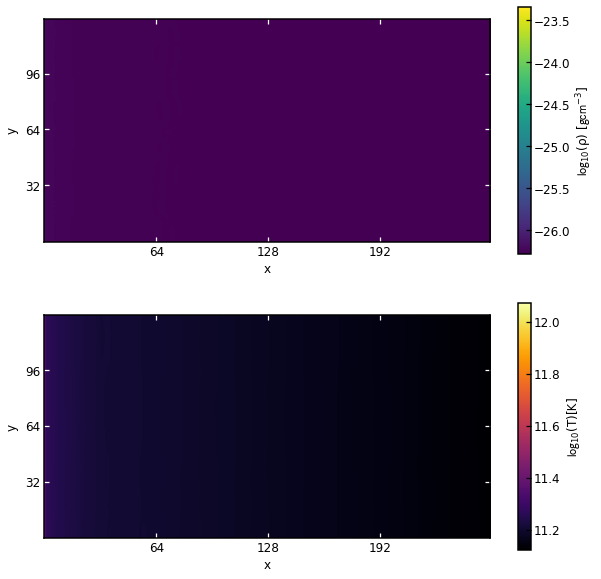

In [4]:
d_gas = np.array(d_gas)
vlims_d = [np.log10(np.amin(d_gas.flatten())), np.log10(np.amax(d_gas.flatten()))]

T = np.array(T)
vlims_T = [np.log10(np.amin(T.flatten())), np.log10(np.amax(T.flatten()))]


for i, d in enumerate(d_gas_ch):
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
    
    # xy gas density projection
    im = axs[0].imshow(np.log10(d_gas[i].T), origin="lower", vmin=vlims_d[0], vmax=vlims_d[1])
    ylabel = r'$\mathrm{log}_{10}(\rho)$ [$\mathrm{g}\mathrm{cm}^{-3}$]'
    cbar = fig.colorbar(im, ax=axs[0])
    cbar.set_label(ylabel)
    axs[0].set_xticks(nx*np.arange(0.25, 1, 0.25))
    axs[0].set_yticks(nz*np.arange(0.25, 1, 0.25))
    axs[0].tick_params(axis='both', which='both', direction='in', color='white', top=1, right=1)
    axs[0].set_xlabel(r"$x$")
    axs[0].set_ylabel(r"$y$")
    

    # xy density-weighted temperature projection
    im = axs[1].imshow(np.log10(T[i].T), origin="lower", cmap="inferno", vmin=vlims_T[0], vmax=vlims_T[1])
    ylabel = r'$\mathrm{log}_{10}(T) [\mathrm{K}]$'
    cbar = fig.colorbar(im, ax=axs[1])
    cbar.set_label(ylabel)
    axs[1].set_xticks(nx*np.arange(0.25, 1, 0.25))
    axs[1].set_yticks(nz*np.arange(0.25, 1, 0.25))
    axs[1].tick_params(axis='both', which='both', direction='in', color='white', top=1, right=1)
    axs[1].set_xlabel(r"$x$")
    axs[1].set_ylabel(r"$y$")
    
    # plot and save
    plt.savefig(outdir + str(i) + ".png", dpi=300)
    plt.show()
    display.clear_output(wait=True)

In [27]:
# slices

outdir = datadir
files = sorted(glob.glob(os.path.join(datadir, "*_slice.h5.0")))

n_out = len(files)

nx, ny, nz = None, None, None
dx, dy, dz = None, None, None

t_arr = []

d_gas, d_dust = [], []

d_gas_ch = []

vx = []
T, P = [], []

n = []

i_out = np.arange(0, n_out)

units = set()

E_ch = []

for i in i_out:
    f = h5py.File(outdir + str(i) + "_slice.h5.0", "r")
    head = f.attrs
    a_group_key = list(f.keys())
    # number of cells in each direction
    nx = head['dims'][0]
    ny = head['dims'][1]
    nz = head['dims'][2]
    
    # time in years
    t_arr.append(np.array(cholla_helper.t_cgs(head["t"][0])/cholla_helper._YR_IN_S))

    # mass density in code units
    d_gas_ch.append(np.array(f["d_xy"]))
    
    d_gas.append(np.array(cholla_helper.d_cgs(np.array(f["d_xy"]))))
    d_dust.append(np.array(cholla_helper.d_cgs(np.array(f["scalar_xy"]))))
    
    E_ch.append(np.array(f["E_xy"]))

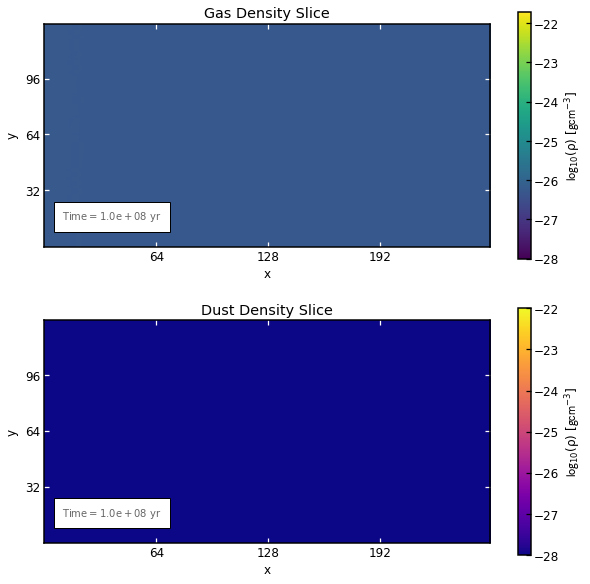

In [30]:
t_arr = np.array(t_arr)

d_gas = np.array(d_gas)
vlims_d = [np.log10(np.amin(d_gas.flatten())), np.log10(np.amax(d_gas.flatten()))]

d_dust = np.array(d_dust)
wh_zero = np.where(d_dust<=0)
d_dust[wh_zero] = 1e-40
vlims_du = [np.log10(np.amin(d_dust.flatten())), np.log10(np.amax(d_dust.flatten()))]

for i, d in enumerate(d_gas):
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
    
    # xy gas density projection
    im = axs[0].imshow(np.log10(d_gas[i].T), origin="lower", vmin=-28, vmax=vlims_d[1])
    ylabel = r'$\mathrm{log}_{10}(\rho)$ [$\mathrm{g}\mathrm{cm}^{-3}$]'
    cbar = fig.colorbar(im, ax=axs[0])
    cbar.set_label(ylabel)
    axs[0].set_xticks(nx*np.arange(0.25, 1, 0.25))
    axs[0].set_yticks(nz*np.arange(0.25, 1, 0.25))
    axs[0].tick_params(axis='both', which='both', direction='in', color='white', top=1, right=1)
    axs[0].set_title(r"Gas Density Slice")
    axs[0].set_xlabel(r"$x$")
    axs[0].set_ylabel(r"$y$")
    axs[0].text(10, 15, '$Time={:.1e}~yr$'.format(t_arr[i]), bbox={'facecolor': 'white', 'pad': 8}, fontsize=10, alpha=0.6)
    

    # xy density-weighted temperature projection
    im = axs[1].imshow(np.log10(d_dust[i].T), origin="lower", cmap="plasma", vmin=-28, vmax=-22)
    ylabel = r'$\mathrm{log}_{10}(\rho)$ [$\mathrm{g}\mathrm{cm}^{-3}$]'
    cbar = fig.colorbar(im, ax=axs[1])
    cbar.set_label(ylabel)
    axs[1].set_xticks(nx*np.arange(0.25, 1, 0.25))
    axs[1].set_yticks(nz*np.arange(0.25, 1, 0.25))
    axs[1].tick_params(axis='both', which='both', direction='in', color='white', top=1, right=1)
    axs[1].set_title(r"Dust Density Slice")
    axs[1].set_xlabel(r"$x$")
    axs[1].set_ylabel(r"$y$")
    axs[1].text(10, 15, '$Time={:.1e}~yr$'.format(t_arr[i]), bbox={'facecolor': 'white', 'pad': 8}, fontsize=10, alpha=0.6)
    
    
    
    # plot and save
    plt.savefig(outdir + str(i) + ".png", dpi=400)
    plt.show()
    display.clear_output(wait=True)